In [1]:
from tqdm import tqdm

import cv2
import matplotlib.pyplot as plt

In [2]:
faceDetector=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
eyeDetector=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')

In [3]:
bgr_image=cv2.imread('people.jpg.webp')
gray_image=cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY)

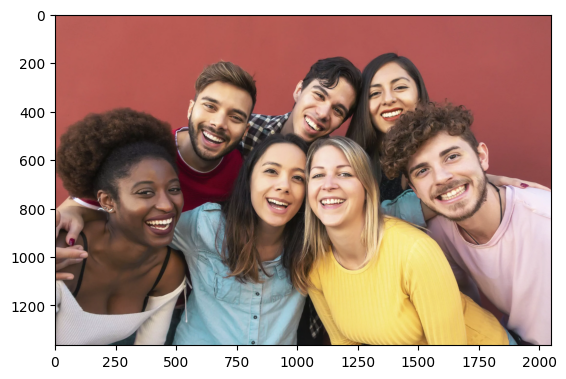

In [7]:
# show original image
plt.imshow(bgr_image[:,:,::-1]) # Matplotlib prints image with RGB format, so we convert BGR to RGB
plt.show()

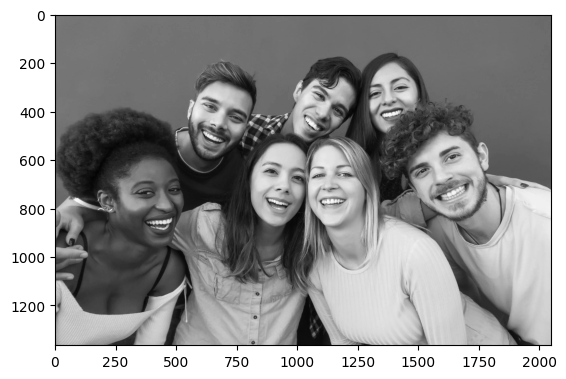

In [5]:
# show grayscale image
plt.imshow(gray_image, cmap='gray') # For displaying a grayscale image, set up the colormapping using the parameters cmap='gray', vmin=0, vmax=255.
plt.show()

In [8]:
faces=faceDetector.detectMultiScale(gray_image, 1.2, 3)

# output structure (x, y, w, h) -> coordinate of top left (x,y) & rectangle's width and height (w,h)
print("Faces detected: ", len(faces))
print("Result data shape: ", faces.shape)
print("1st data: ", faces[0])

Faces detected:  4
Result data shape:  (4, 4)
1st data:  [1251  213  256  256]


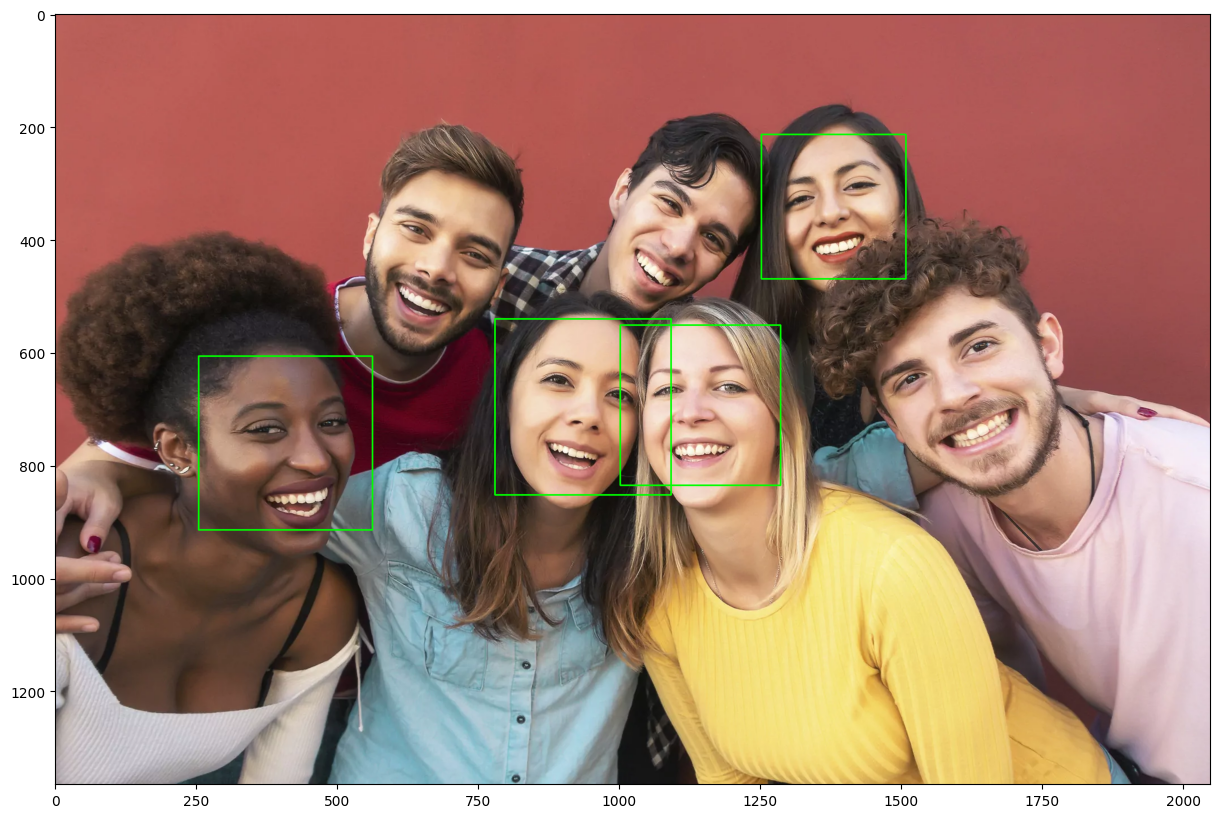

In [9]:
for (x, y, w, h) in faces:
    # parameters:
    #       image
    #       top left: (x,y)
    #       bottom right: (x,y)
    #       frame color: (r,g,b)
    #       frame width: int
    cv2.rectangle(bgr_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# show the result
plt.figure(figsize=(20, 10))
plt.imshow(bgr_image[:,:,::-1])
plt.show()

In [12]:
# 透過OpenCv擷取影像
# https://www.youtube.com/watch?v=aN862xUWt5I
video_reader = cv2.VideoCapture('20240403_120751.mp4')

# 取得影像的基本資訊
nb_frames = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT)) # 總共有多少frames
frame_h = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))  # 每個frame的高
frame_w = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))   # 每個frame的寬

# 找出OpenCV的version
(major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')

# 找出原始影像的fps(frame per seconds)
if int(major_ver)  < 3 :
    fps = video_reader.get(cv2.cv.CV_CAP_PROP_FPS)
    print("Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): {0}".format(fps))
else :
    fps = video_reader.get(cv2.CAP_PROP_FPS)
    print("Frames per second using video.get(cv2.CAP_PROP_FPS) : {0}".format(fps))

# 設定影像的輸出
video_writer = cv2.VideoWriter('IMG_2923_output.mp4',
                               cv2.VideoWriter_fourcc(*'XVID'),
                               fps, # 設定輸出的fps
                               (frame_w, frame_h))
# 計算有多少人臉被識別出來
total_faces_detected = 0

# 迭代每一個frame來進行圖像偵測
for i in tqdm(range(nb_frames)):
    ret, bgr_image = video_reader.read() # 讀取一個frame

    # 將BGR圖像轉成灰階
    gray_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY)

    # 人臉偵測
    faces = faceDetector.detectMultiScale(gray_image, 1.3, 5)

    # 把這個frame所識別出來的人臉計數記錄下來
    total_faces_detected += len(faces)

    # 迭代每一個偵測的人臉位置 (x, y, w, h) -> 左上角的(x,y)座標, 以及矩型的寬高(w, h)
    for (x, y, w, h) in faces:
        # 透過OpenCV來把邊界框畫出來
        cv2.rectangle(bgr_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # 透過OpenCV把影像輸出出來
    video_writer.write(bgr_image)

video_reader.release() # 釋放資源
video_writer.release() # 釋放資源

Frames per second using video.get(cv2.CAP_PROP_FPS) : 120.0


100%|██████████| 198/198 [02:12<00:00,  1.50it/s]


In [11]:
print("Total faces detected: ", total_faces_detected)

Total faces detected:  139
